# Heart Disease Prediction
##### _Notebook 2 of 2 of the End-to-end ML Workflow_

This heart disease dataset is a public health dataset that can be retrieved from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).

### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Content
Attribute information:
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
*The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.*

## 5. Modelling
_What kind of model should we use? How to use a model?_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sbn  

### 5.1 Import the Preprocessed Data

In [2]:
# Importing the data
heart_disease = pd.read_csv("data/heart-disease-preprocessed.csv")
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 5.2 Choosing the Right Estimator
Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.
Different estimators are better suited for different types of data and different problems.
![title](https://scikit-learn.org/stable/_static/ml_map.png)

#### 5.2.1 Linear SVC

In [3]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate LinearSVC
clf = LinearSVC(C = 1, max_iter = 100000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

D:\Projects\ml-training\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7543859649122807

In [4]:
clf.get_params()

{'C': 1,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 100000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

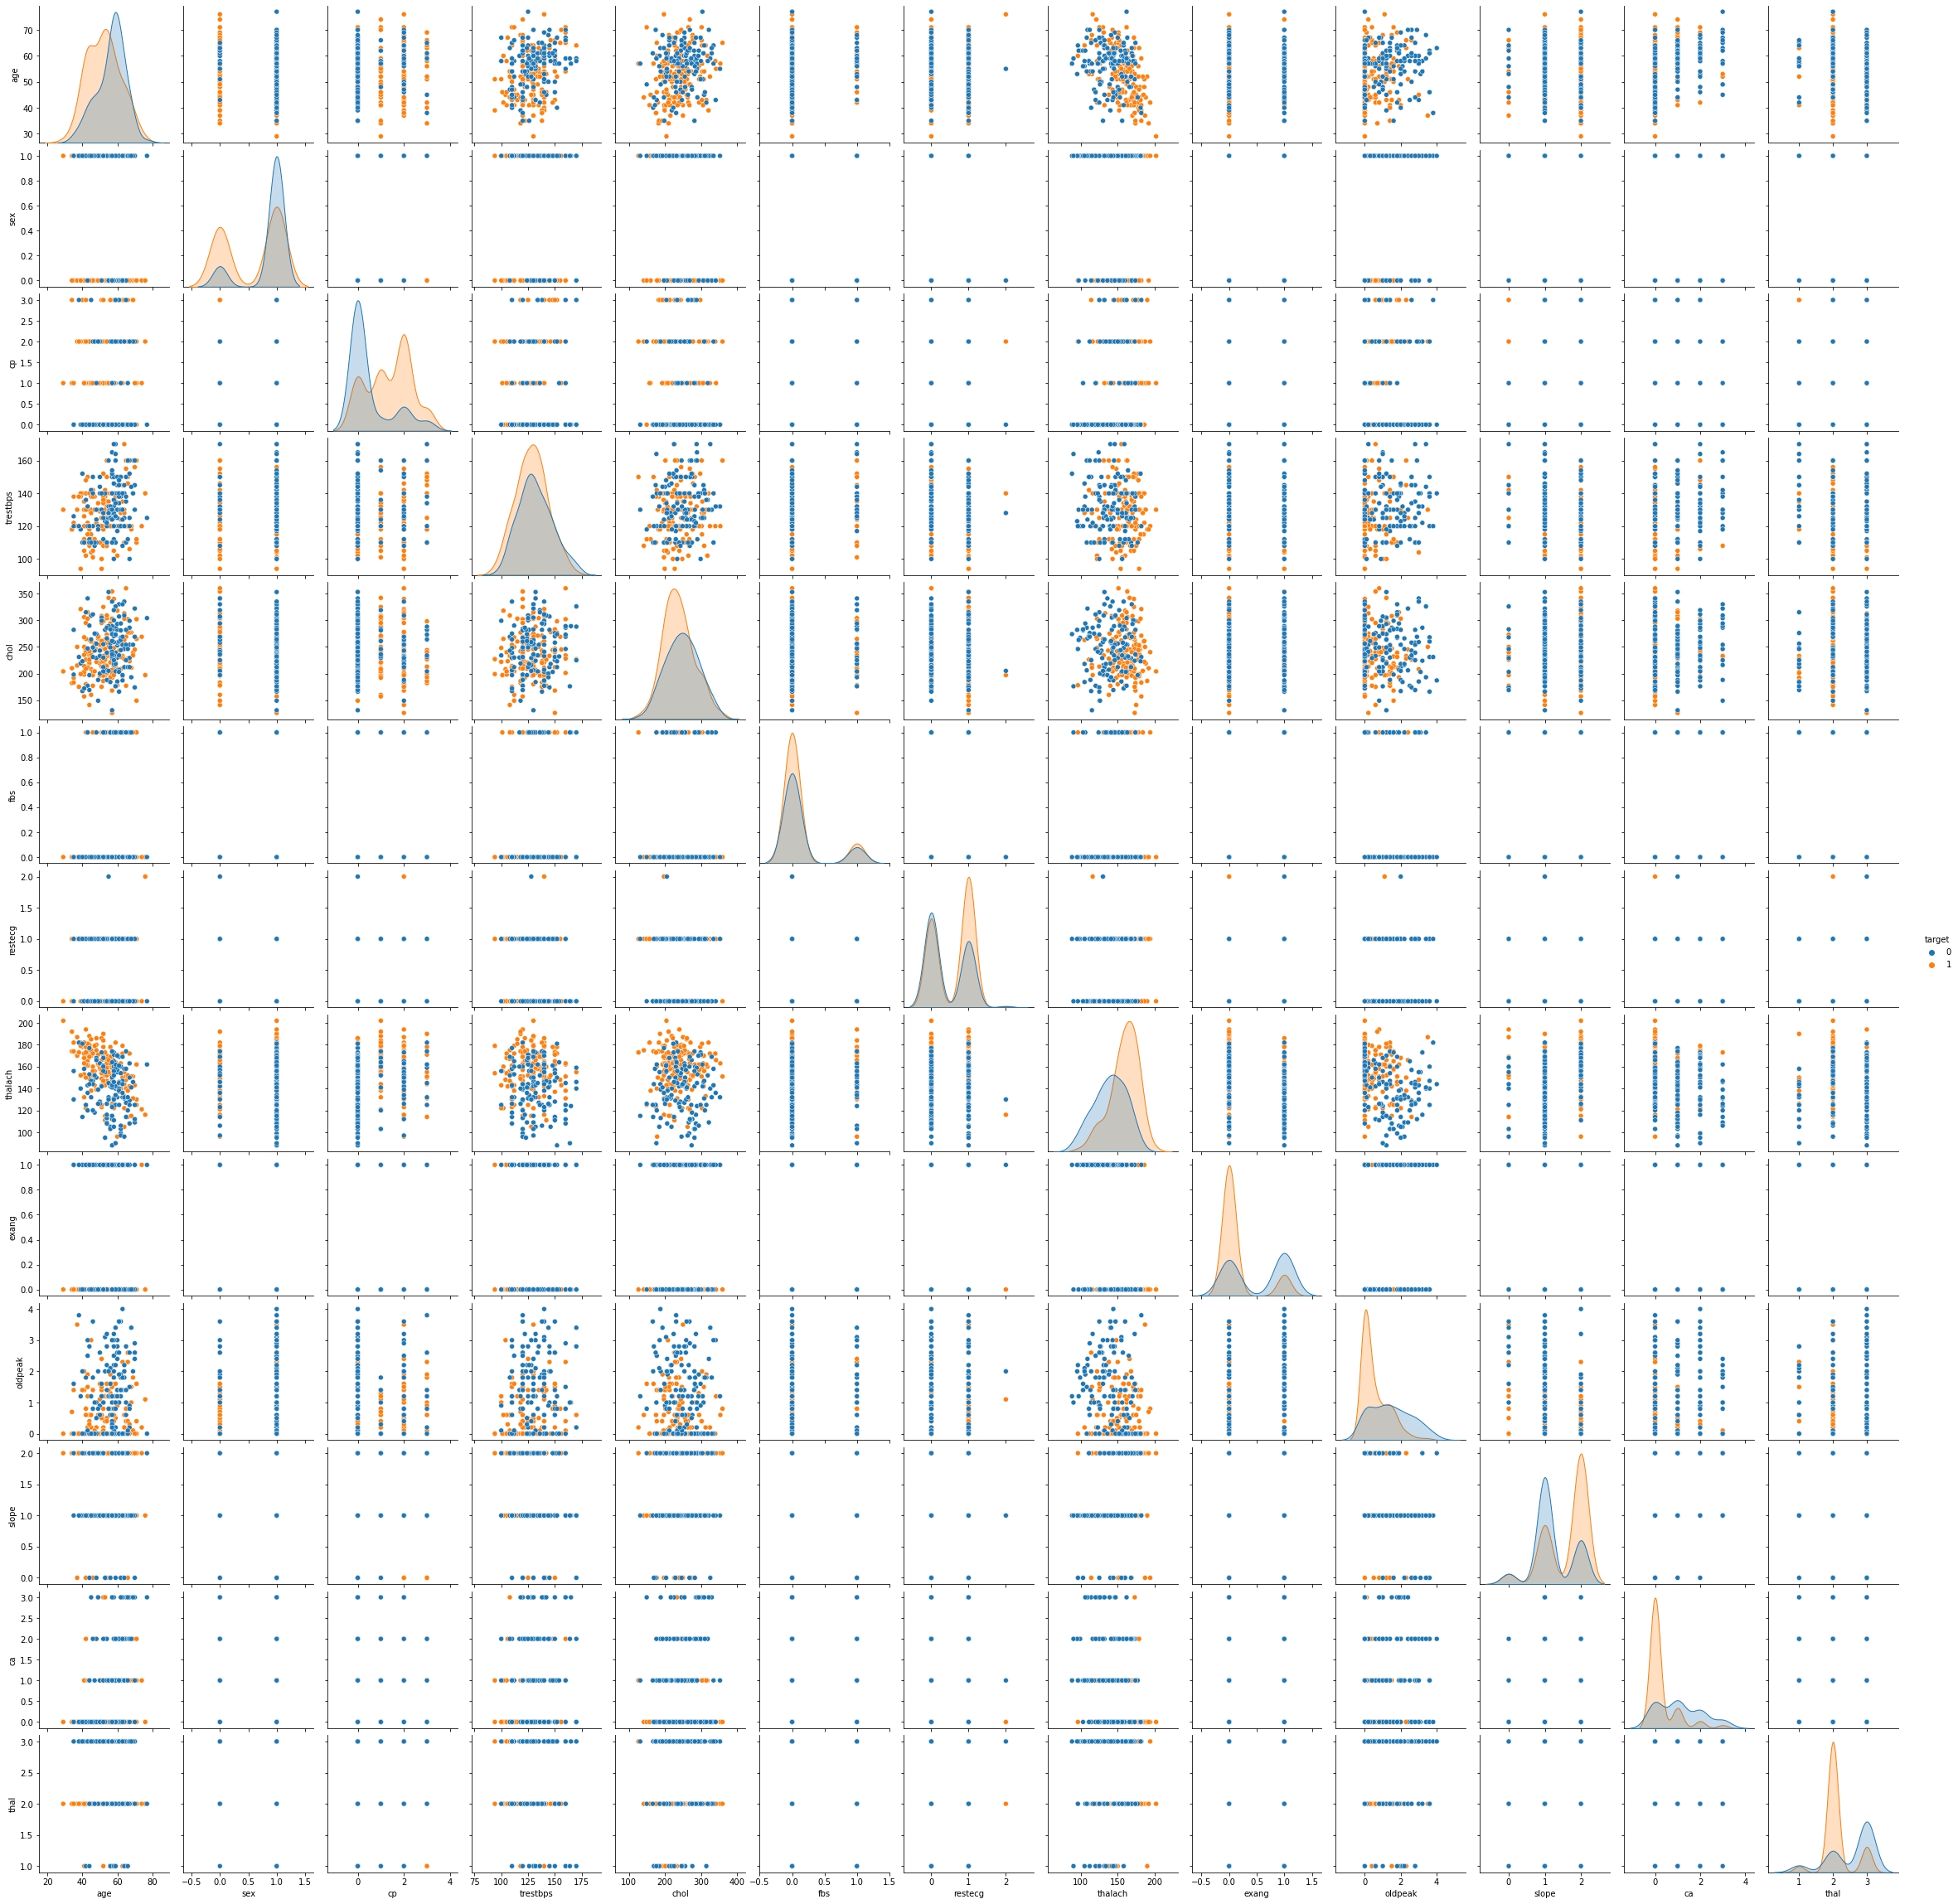

In [5]:
sbn.pairplot(heart_disease, hue='target')
plt.show()

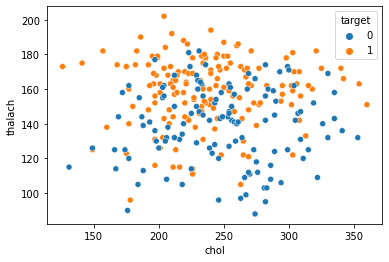

In [6]:
sbn.scatterplot(data=heart_disease, x = "chol", y="thalach", hue = "target")
plt.show()

In [26]:
X = heart_disease[["trestbps","thalach", "chol"]].copy()
Y= np.array(heart_disease["target"])

# Sensitivity to feature scales so let us transform our columns
X.trestbps = (X.trestbps - np.mean(X.trestbps))/np.std(X.trestbps)
X.chol = (X.chol - np.mean(X.chol))/np.std(X.chol)
X.thalach = (X.thalach - np.mean(X.thalach))/np.std(X.thalach)
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

model = LinearSVC(C = 1, max_iter = 10000000)
clf = model.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7017543859649122

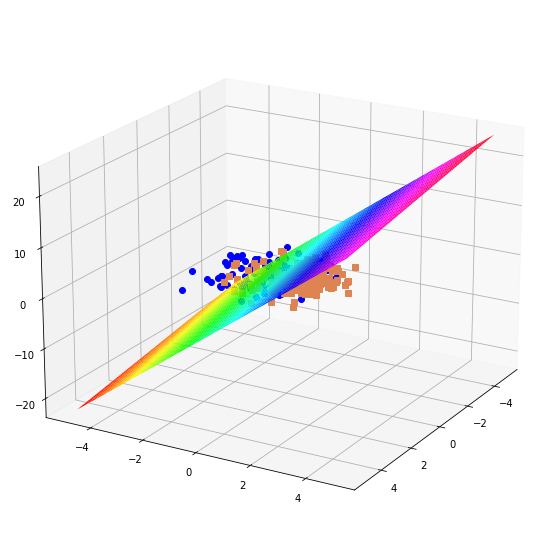

In [35]:
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure(figsize=(12,10))
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'s', color="#DD8452")
ax.plot_surface(x, y, z(x,y), cmap = 'hsv')
ax.view_init(20,30)
plt.show()

The Linear SVM produced an accuracy of 79.51% and we can optimize our features or modify hyperparamters but let us try and look at the sci-kit learn estimator chart. 

#### 5.2.2 Naive Bayes

In [38]:
# Import the LinearSVC estimator class
from sklearn.naive_bayes import GaussianNB

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Gaussian Naive Bayes
gnb = GaussianNB()

# Fit the model to the data (training the machine learning model)
gnb.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
gnb.score(X_test, y_test)

0.8245614035087719

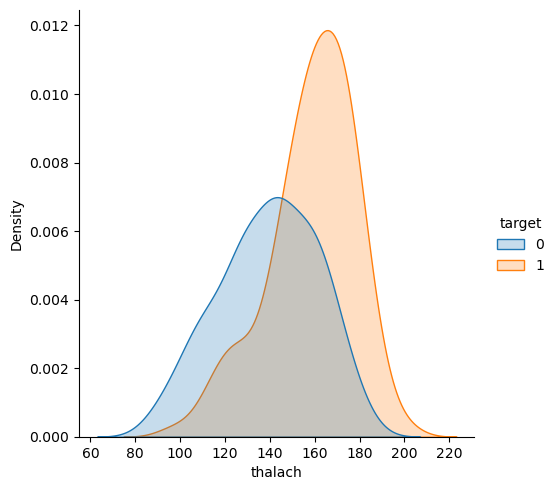

In [39]:
p = sbn.displot(heart_disease, x="thalach", hue="target", kind="kde", fill=True)
p.fig.set_dpi(100)

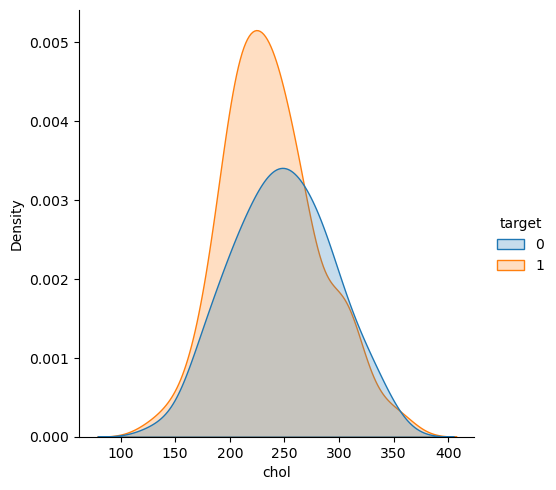

In [40]:
p = sbn.displot(heart_disease, x="chol", hue="target", kind="kde", fill=True)
p.fig.set_dpi(100)

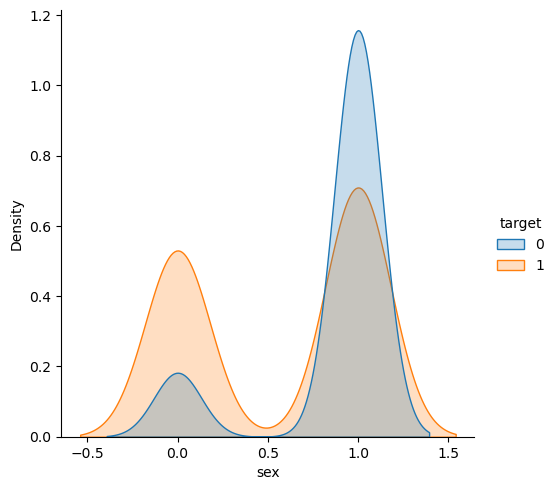

In [41]:
p = sbn.displot(heart_disease, x="sex", hue="target", kind="kde", fill=True)
p.fig.set_dpi(100)

In [42]:
y_preds = gnb.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [43]:
y_test = np.array(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [44]:
accuracy_score(y_test, y_preds)

0.8245614035087719

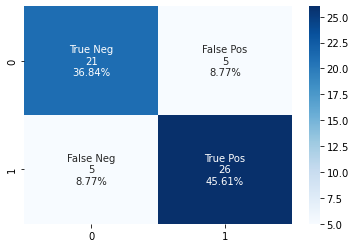

In [45]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sbn.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

Our naive-bayes classification has produced a good accuracy of 80% already but having 20 incorrect heart disease prediction out of 100 patients seems a little bit high, let us try implementing another model.

#### 5.2.3 Random Forest

In [16]:
# Import the LinearSVC estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(23)

# Make the data
X = heart_disease.drop("target", axis = 1)
y= heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate Random Forest Classifier
# clf = RandomForestClassifier(n_estimators=144, bootstrap=True, max_samples=0.80)
clf = RandomForestClassifier(n_estimators = 110,  bootstrap=True, max_samples=0.80)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.9298245614035088

Let us try mapping out one of our trees.

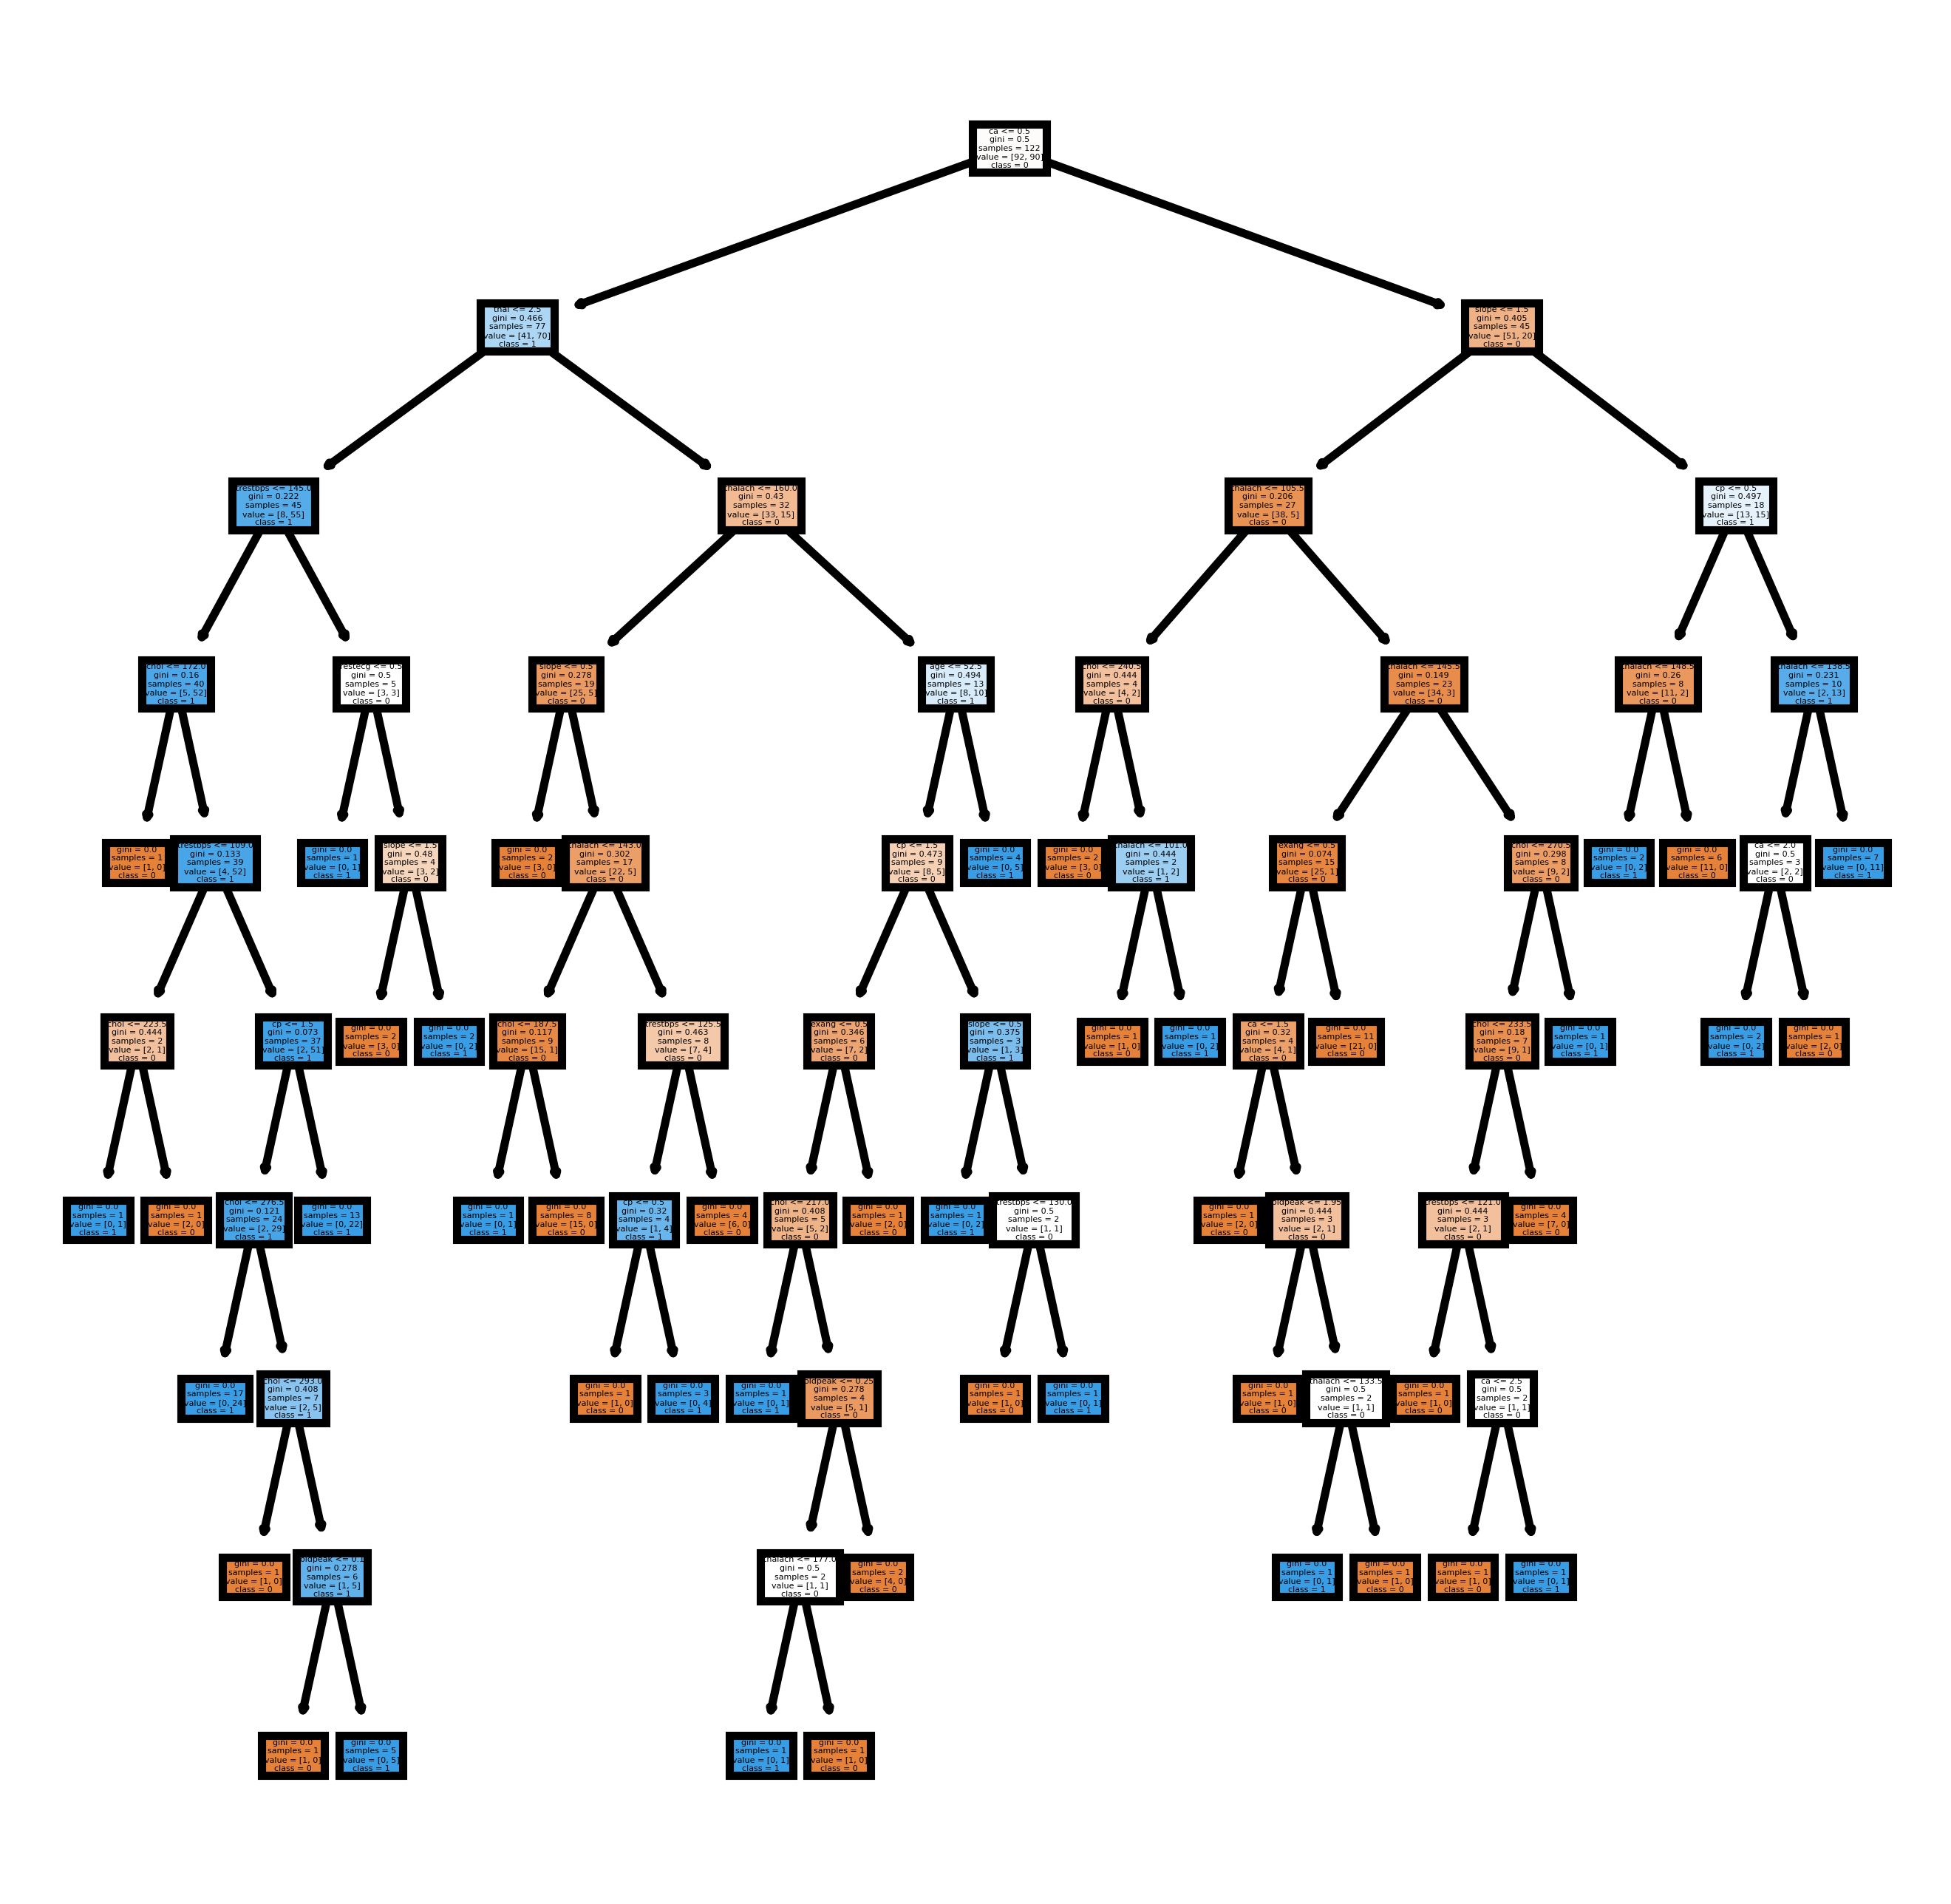

In [17]:
from sklearn import tree
fn=X.columns.values
cn=np.array(['0','1'])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[109],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

It seems that our accuracy has improved! Let us settle for this model for now. We can try and export it and use it as our model for deployment. But let's see what else can we do.

### 5.3 Hyperparameters

There are multiple ways of tuning hyperparameters, in here we'll be showing one of them.

In [18]:
# Improving a random forest model
# Try a different amount of n_estimators

for i in range(10, 200, 5):
    np.random.seed(23)
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i,  bootstrap=True, max_samples=0.80).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set: 89.47%
 
Trying model with 15 estimators...
Model accuracy on test set: 91.23%
 
Trying model with 20 estimators...
Model accuracy on test set: 91.23%
 
Trying model with 25 estimators...
Model accuracy on test set: 92.98%
 
Trying model with 30 estimators...
Model accuracy on test set: 94.74%
 
Trying model with 35 estimators...
Model accuracy on test set: 92.98%
 
Trying model with 40 estimators...
Model accuracy on test set: 91.23%
 
Trying model with 45 estimators...
Model accuracy on test set: 91.23%
 
Trying model with 50 estimators...
Model accuracy on test set: 87.72%
 
Trying model with 55 estimators...
Model accuracy on test set: 87.72%
 
Trying model with 60 estimators...
Model accuracy on test set: 89.47%
 
Trying model with 65 estimators...
Model accuracy on test set: 89.47%
 
Trying model with 70 estimators...
Model accuracy on test set: 89.47%
 
Trying model with 75 estimators...
Model accuracy on test set: 9

In [19]:
# Setup random seed
np.random.seed(23)
# Retrain our model
clf = RandomForestClassifier(n_estimators = 125,  bootstrap=True, max_samples=0.80).fit(X_train, y_train)

In [20]:
clf.score(X_train, y_train)

1.0

In [21]:
clf.score(X_test, y_test)

0.9473684210526315

In [22]:
# Setup random seed
np.random.seed(23)
# Retrain our model
clf = RandomForestClassifier(n_estimators = 125, bootstrap=True, max_samples=0.80).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9473684210526315

## 6. Deployment
_How can we share our model?_

In [23]:
# Export the model into a pickle file
import pickle

pickle.dump(clf, open("heart_disease_random_forest_model.pkl", "wb"))

In [24]:
# Import back the exported model and test for accuracy just to double check
loaded_model = pickle.load(open("heart_disease_random_forest_model.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.9473684210526315

From here, we can now use the pickle file to predict if a person has heart disease. The next part of our deployment step would be to create an interface and deploy it in the web.